# Adaboost

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Stress_Dataset.csv')

In [3]:
data.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

In [5]:
data.describe()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Do you find that your relationship often causes you stress?,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,...,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,0.349941,20.071174,2.997628,2.755635,2.543298,2.786477,2.663108,2.628707,2.702254,2.699881,...,2.514828,2.447212,2.488731,2.517200,2.424674,2.581257,2.641756,2.756821,3.258600,2.398577
std,0.477234,5.429502,1.134639,1.118650,1.201330,1.266959,1.266376,1.266593,1.314213,1.313673,...,1.241869,1.195995,1.196116,1.247563,1.256795,1.288163,1.305848,1.263008,1.202543,1.112485
min,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,19.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,1.000000,20.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
max,1.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
target_col = data.columns[-1]
X = data.drop(columns=[target_col]).copy()
y = data[target_col].copy()

In [8]:
print("Feature dtypes:\n", X.dtypes.value_counts())
print("Target sample values:", y.unique()[:10])

# Encode target (string categories -> integers)
le_y = LabelEncoder()
y_enc = le_y.fit_transform(y)

Feature dtypes:
 int64    25
Name: count, dtype: int64
Target sample values: ['Eustress (Positive Stress) - Stress that motivates and enhances performance.'
 'No Stress - Currently experiencing minimal to no stress.'
 'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.']


In [9]:
X_proc = X.copy()
for c in X_proc.columns:
    if X_proc[c].dtype == "object":
        X_proc[c] = LabelEncoder().fit_transform(X_proc[c].astype(str))

In [10]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_proc), columns=X_proc.columns)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (674, 25), Test shape: (169, 25)


In [13]:
stump = DecisionTreeClassifier(max_depth=1, random_state=42)

# sklearn AdaBoost parameter name changed across versions; use estimator if supported.
try:
    clf = AdaBoostClassifier(estimator=stump, n_estimators=50, random_state=42)
except TypeError:
    # older sklearn versions use base_estimator
    clf = AdaBoostClassifier(base_estimator=stump, n_estimators=50, random_state=42)

clf.fit(X_train, y_train)

C:\Users\meetb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   random_state=42)

In [14]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (test):", accuracy)
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=le_y.classes_))

# For clarity, compute precision/recall/f1-score arrays and show macro averages
prec, rec, f1, sup = precision_recall_fscore_support(y_test, y_pred, average=None)
print("Per-class precision, recall, f1:")
for i, cls in enumerate(le_y.classes_):
    print(f" {cls}: P={prec[i]:.3f}, R={rec[i]:.3f}, F1={f1[i]:.3f}, support={sup[i]}")

Accuracy (test): 0.8402366863905325

Classification report:
                                                                                 precision    recall  f1-score   support

Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.       0.67      0.33      0.44         6
   Eustress (Positive Stress) - Stress that motivates and enhances performance.       0.96      0.86      0.91       154
                       No Stress - Currently experiencing minimal to no stress.       0.26      0.78      0.39         9

                                                                       accuracy                           0.84       169
                                                                      macro avg       0.63      0.66      0.58       169
                                                                   weighted avg       0.91      0.84      0.86       169

Per-class precision, recall, f1:
 Distress (Negative Stress) - Stress that causes anxiety 

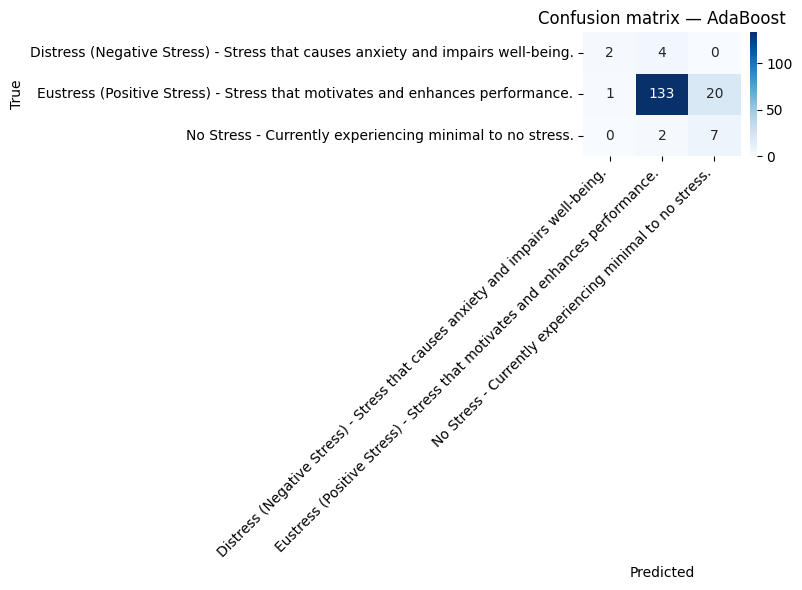

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_y.classes_, yticklabels=le_y.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix — AdaBoost')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# split PCA data the same way:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

C:\Users\meetb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


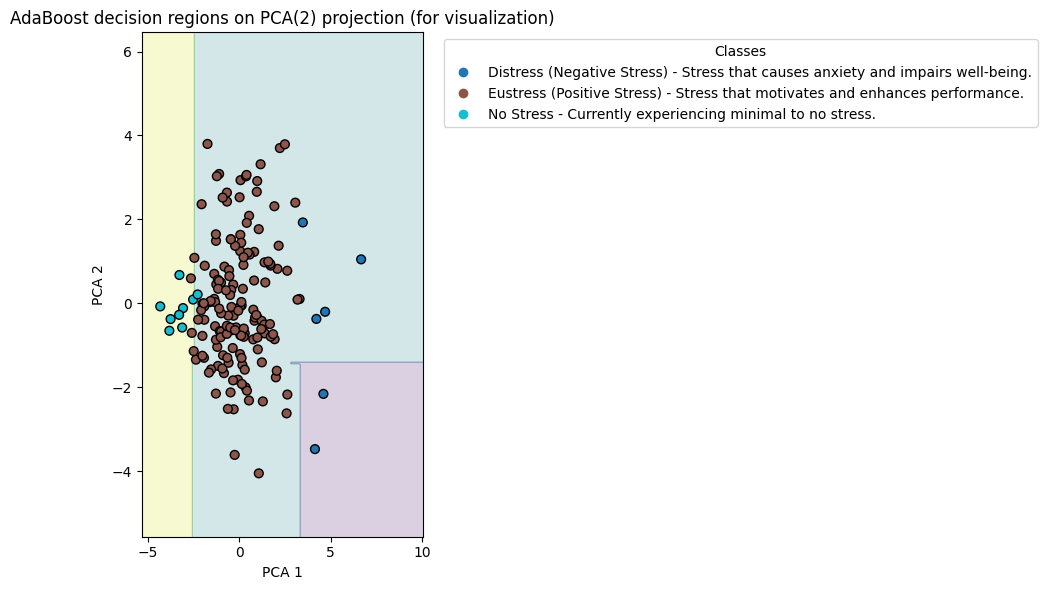

In [18]:
try:
    clf_pca = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
                                 n_estimators=50, random_state=42)
except TypeError:
    clf_pca = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
                                 n_estimators=50, random_state=42)
clf_pca.fit(X_pca_train, y_pca_train)

# Create mesh
x_min, x_max = X_pca[:,0].min() - 1, X_pca[:,0].max() + 1
y_min, y_max = X_pca[:,1].min() - 1, X_pca[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf_pca.predict(grid).reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.2)
scatter = plt.scatter(X_pca_test[:,0], X_pca_test[:,1], c=y_pca_test, s=40, cmap='tab10', edgecolor='k')

# Use legend_elements() correctly and convert arrays to lists to avoid ambiguous truth-value checks
leg_handles, leg_labels = scatter.legend_elements()
plt.legend(handles=list(leg_handles), labels=list(le_y.classes_), title="Classes",
           bbox_to_anchor=(1.05,1), loc='upper left')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('AdaBoost decision regions on PCA(2) projection (for visualization)')
plt.tight_layout()
plt.show()